# Assignment 7
**CS283 Computer Vision, Harvard University, Fall 2019**

**Due Wednesday, Oct. 30, at 5:00pm**

Name: *(<font color=red>Huopu Zhang</font>)*

---

The purpose of this homework is to reinforce the topics of radiometry, reflectance, and photometric stereo. Forsyth and Ponce's chapter on Radiometry will be helpful for this assignment.

As always, your submission must follow the Submission Guidelines and take the form of an HTML version of the notebook (<tt>.html</tt>), and a ZIP containing your Jupyter notebook (<tt>.ipynb</tt>), and accompanying <tt>./data</tt> and <tt>./src</tt> and possibly <tt>./img</tt> folders. (The <tt>./src</tt> folder will be empty this week.)

In [1]:
# Run this cell (only once) to install the unzip command.
# If you already installed this for previous assignments, no need to reinstall.
! sudo apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following packages were automatically installed and are no longer required:
  linux-aws-headers-4.15.0-1044 linux-aws-headers-4.15.0-1047
  linux-aws-headers-4.15.0-1048 linux-aws-headers-4.15.0-1050
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 139 not upgraded.


In [ ]:
# Extract required pset folders (make sure you ran the first cell first)
! unzip pset7.zip

Archive:  pset7.zip
replace data/bunny.pickle? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
# Import any required libraries here
import cv2                               # OpenCV
import numpy as np                       # numpy
import pickle

# Use this line to make matplotlib plot inline (only need to call it once when importing matplotlib)
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
# Modify this line to adjust the displayed plot size. You can also call
# it with different parameters before specific plots.
plt.rcParams['figure.figsize'] = [10, 10]

## Question 1 (10 points)

For Lambertian surfaces, the BRDF is a constant function of the input and output directions. For such a material, we often describe the reflectance in terms of its *albedo*, which is given the symbol $\rho$.  For a Lambertian
surface, the BRDF and albedo are related by $f_r(\vec{v}_i,\vec{v}_o)=\rho/\pi.$  Using conservation of energy, prove
that $0\le\rho\le1$.

### Answer:
The radiance leaving the surface can be expressed as:
\begin{equation*}
L_{out} = \int _{\Omega_{out}}L_{in}f(\omega_{in},\omega_{out})cos\theta_{out}d\omega_{out}
\end{equation*}

considering the constraint of conservation of energy, we have:
\begin{equation*}
L_{in}\int _{\Omega_{out}}f(\omega_{in},\omega_{out})cos\theta_{out}d\omega_{out} \leq L_{in}
\end{equation*}

\begin{equation*}
\int _{\Omega_{out}}f(\omega_{in},\omega_{out})cos\theta_{out}d\omega_{out} \leq 1
\end{equation*}

Here we have $f(\omega_{in},\omega_{out}) = \frac{\rho}{\pi}$, substituting in the equation above, we have:
\begin{equation*}
\frac{\rho}{\pi}\int_{\Omega_{out}}cos\theta_{out}d\omega_{out} \leq 1
\end{equation*}

Translate into spherical surface integral, we have:
\begin{equation*}
\int_{\Omega_{out}}cos\theta_{out}d\omega_{out} =\iint_{}{} cos\varphi dS
\end{equation*}
Here S is half sphere with radius equal to 1. So we have:
\begin{equation*}
\iint_{}{} cos\varphi dS = \iint_{}{} cos\varphi sin\varphi dA = \int_{0}^{2\pi}\int_{0}^{\frac{\pi}{2}}\frac{1}{2}sin2\varphi d\varphi d\theta = \int_{0}^{2\pi}\frac{1}{2}d\theta = \pi
\end{equation*}

substituting back to
\begin{equation*}
\frac{\rho}{\pi}\int_{\Omega_{out}}cos\theta_{out}d\omega_{out} \leq 1
\end{equation*}

we have:
\begin{equation*}
\frac{\rho}{\pi}\int_{\Omega_{out}}cos\theta_{out}d\omega_{out} = \frac{\rho}{\pi}{\pi} = \rho \leq 1
\end{equation*}

we also have the trivial:
$0 \leq \rho$, hence:
\begin{equation*}
0 \leq \rho \leq 1
\end{equation*}

## Question 2 (10 points)

Load the file <tt>bunny.pickle</tt> from the data folder of this assignment.

There is a single variable in this file; the variable <tt>N</tt> is an $h\times w\times 3$ array of surface normals. <tt>N[i,j,0], N[i,j,1]</tt>, and <tt> N[i,j,2]</tt> are the $x,\ y$, and $z$ components of the surface normal at
the $(i, j)^\mathrm{th}$ surface point, as observed by an orthographic camera with view direction $(0,0,1)$.  

**a.** Use <tt>matplotlib.pyplot.quiver()</tt> to display the $x$-$y$ components of the normal field and print the result. (See the example in *Hints and Information* below.)


Text(0.5, 1.0, 'Bunny Surface Normal X-Y Components')

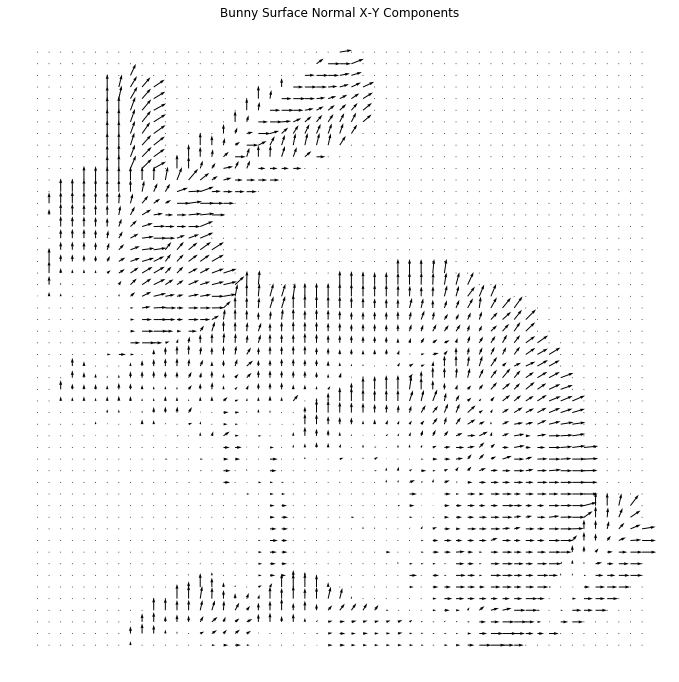

In [2]:
file = open('data/bunny.pickle', 'rb')
normals = pickle.load(file)['N']
vect_x = normals[:,:,0]
vect_y = normals[:,:,1]

stride = 8

plt.figure(figsize = (12,12))
plt.quiver(vect_x[::stride, ::stride], vect_y[::stride, ::stride], cmap='gray', scale = 45, width = 0.0015)
plt.gca().invert_yaxis()
plt.axis('image')
plt.axis('off')
plt.title('Bunny Surface Normal X-Y Components')


**b.** Compute and display the radiance emitted from each point assuming Lambertian reflectance and constant albedo (equal to one), with a distant point light source in direction $\hat{s}=(0,\ 0,\ 1)$, by typing <tt>plt.imshow(N[:,:,2],cmap='gray')</tt>. Explain why this works.

Text(0.5, 1.0, 'Radiance Mapping')

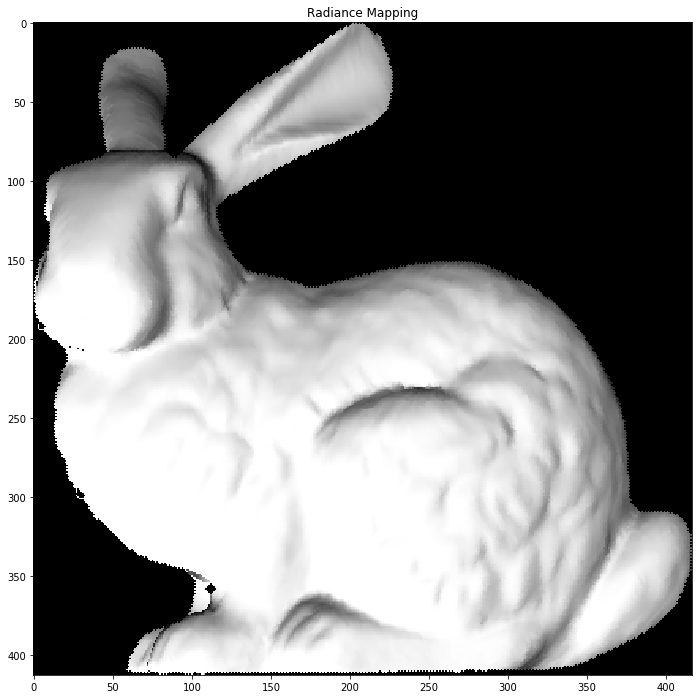

In [3]:
plt.figure(figsize = (12,12))
plt.imshow(normals[:,:,2],cmap='gray')
plt.title('Radiance Mapping')

### Answer:
Here we have directional light $\hat{s}=(0,\ 0,\ 1)$, in this case, the radiance emitted in each point can be expressed as:
\begin{equation*}
L_{out} = \int _{\Omega}L_{in}f(\omega_{in},\omega_{out})cos\theta_{in}d\omega
\end{equation*}
We have $\rho = 1$ as stated (albedo is constant and is taken as 1), and $\vec{n}$ stands for the surface normal at a point so the equation can be written as:
\begin{equation*}
I = \rho \vec{n}\cdot \vec{s} = \vec{n}\cdot \vec{s}
\end{equation*}

as $\hat{s}=(0,\ 0,\ 1)$, the dot product of $\hat{s} \cdot \vec{n}$ is just equal to the $Z$ component of $\vec{n}$, so the radiance emitted in each point can be simply expressed as the $Z$ component of surface normal at each point.

**c.** Compute, display and print the emitted radiance for three different light source directions which are rotated i) $45^\circ$ up, ii) $45^\circ$ right, and iii) $75^\circ$ right from the frontal direction $\hat{s}=(0,\ 0,\ 1)$. Can you spot errors in the field of surface normals?  What are the illumination effects being ignored in this calculation of scene radiance?

(-0.5, 416.5, 412.5, -0.5)

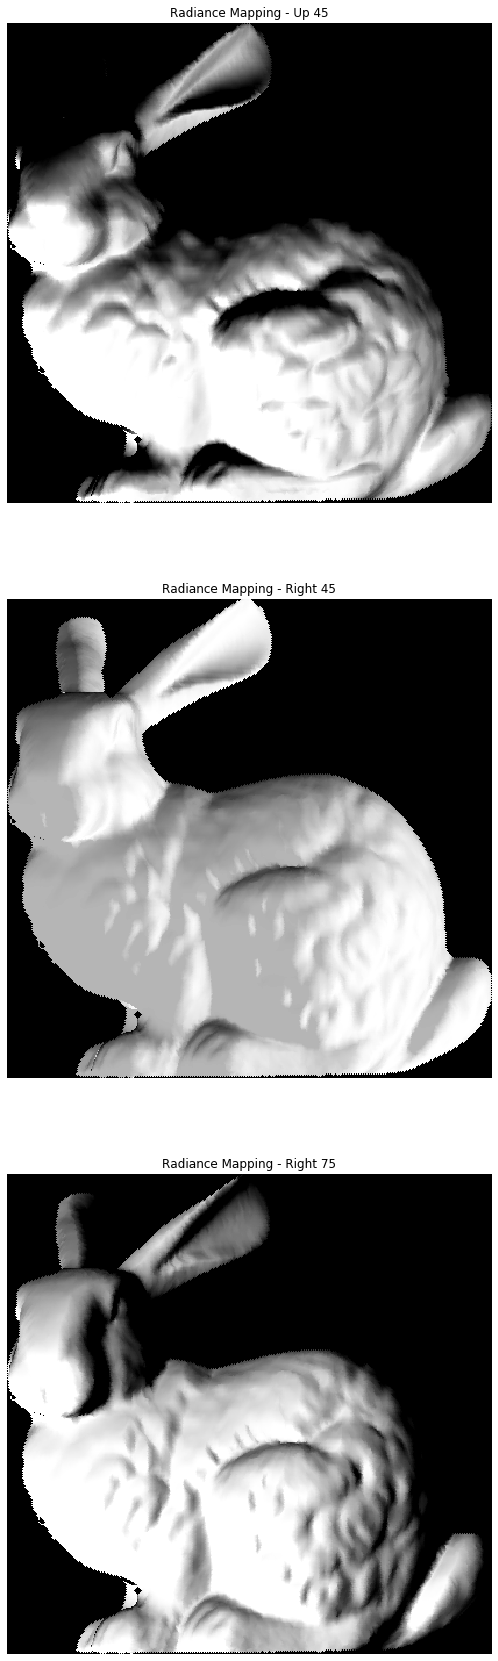

In [4]:
s_up = np.array([0, -np.sqrt(2)/2, np.sqrt(2)/2])
s_right = np.array([np.sqrt(2)/2, 0 , np.sqrt(2)/2])
s_75 = np.array([np.cos(15), 0 , np.cos(75)])

rad_up = normals@s_up
rad_up[np.where(rad_up < 0)] = 0

rad_right = normals@s_right
rad_right[np.where(rad_right < 0)] = 0

rad_75 = normals@s_75
rad_75[np.where(rad_75 < 0)] = 0

fig, ax = plt.subplots(3, 1, figsize = (12, 30))

ax[0].imshow(rad_up,cmap='gray')
ax[0].set_title('Radiance Mapping - Up 45')
ax[0].axis('off')
ax[1].imshow(rad_right,cmap='gray')
ax[1].set_title('Radiance Mapping - Right 45')
ax[1].axis('off')
ax[2].imshow(rad_75,cmap='gray')
ax[2].set_title('Radiance Mapping - Right 75')
ax[2].axis('off')

### Answer:
The foot and thigh of the bunny don't look right. The gap between the body and the thigh is rendered too bright. This is because ambient occlusion is not taken into consideration so the degree of exposure to the ambient light of certain points in deeper areas is not calculated. In other words, the visibility function is not included in calculation.


## Question 3 (10 points)

A small Lambertian source $dA$ is centered at $P$ and emits radiance L. The orientation of this patch is the same as that of a plane containing two points,  $X_1$ and $X_2$. The point $X_1$ is the point on this plane that is closest to $P$, and the distance from $P$ to $X_1$ is $D$ as shown.

<img src="img/radiance_irradiance.png" width="400">

**a.** Calculate the solid angle subtended by $dA$ at points $X_1$ and $X_2$.

### Answer:
The solid angle subtended by a small patch $dA$ can be expressed as $d\omega =\frac{dAcos\theta }{r^{2}}$, where $\theta$ is the anlge of surface foreshortening and $r$ is the distance from the patch to the point. Here for $X_{1}$, $\theta = 0$, $r = D$, so the solid angle subtended by $dA$ at point $X_{1}$ can be expressed as:

\begin{equation*}
d\omega_{1} = \frac{dA}{D^{2}}
\end{equation*}

For $X_{2}$, $\theta = \alpha$, $r = \frac{D}{cos\alpha}$, so the solid angle subtended by $dA$ at point $X_{2}$ can be expressed as:

\begin{equation*}
d\omega_{2} = \frac{dAcos^{3}\alpha}{D^{2}}
\end{equation*}

**b.** Calculate the irradiance $E$ incident on the plane at points $X_1$ and $X_2$, and calculate the ratio $E(X_1)/E(X_2)$.

### Answer:
The relation between irradiance $E$ and radiance $L$ can be expressed as $E = |W|Lcos\alpha$, where $\alpha$ is the surface foreshortening angle, $|W|$ is the solid angle. So here, as we know that the radiance emitted by $dA$ is $L$ and we also know the solid angle subtended by $dA$ at $X_{1}$ and $X_{2}$, we can get the irradiance at point $X_{1}$ as:

\begin{equation*}
E(X_{1}) = \frac{LdA}{D^{2}}
\end{equation*}

and the irradiance at point $X_{2}$ as:

\begin{equation*}
E(X_{2}) = \frac{LdAcos^{4}\alpha}{D^{2}}
\end{equation*}

then we get the ratio $E(X_1)/E(X_2)$ as:

\begin{equation*}
\frac{1}{cos^{4}\alpha}
\end{equation*}

## Question 4 (20 points)

The data folder of this assignment contains a set of seven photometric stereo images <tt>./data/female_01.tif</tt> through <tt>./data/female_07.tif</tt>, along with <tt>sources.pickle</tt>, which containins the light source vectors (in a variable named <tt>S</tt>).

**a.** Estimate the surface normal and grayscale albedo for each pixel. Plot these values using <tt> plt.imshow</tt> for the albedo values and <tt> plt.quiver</tt> for the surface normals.

(431, 369, 3)


Text(0.5, 1.0, 'Surface Normals X-Y')

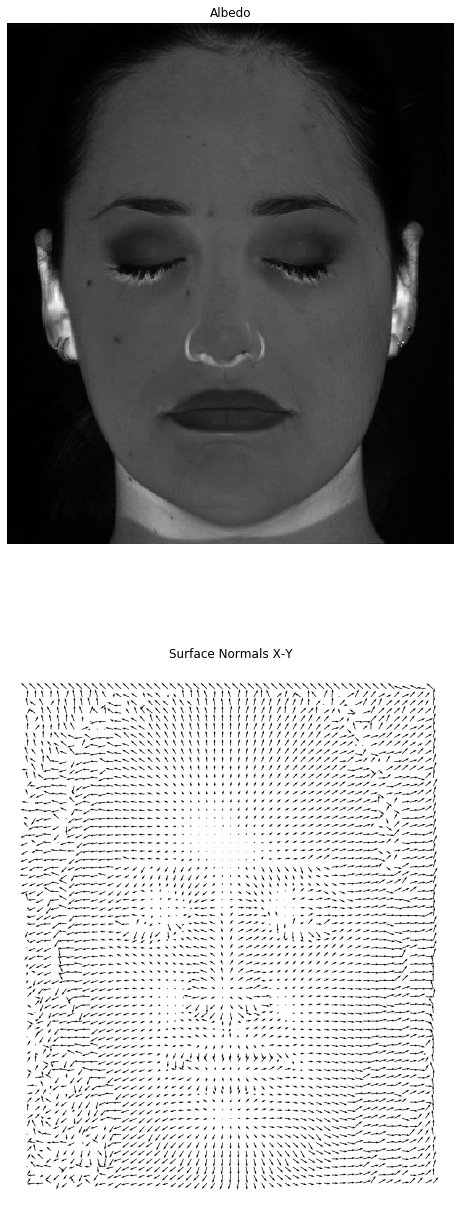

In [5]:
ims = []

im0 = cv2.imread('data/female_01.tif', 0)
size = im0.shape

for i in range(1,8):
    ims.append(cv2.imread('data/female_0'+ str(i) +'.tif', 0).flatten())
    
ims = np.array(ims)
file2 = open('data/sources.pickle', 'rb')
lights = pickle.load(file2)['S']

bmatrix = np.linalg.lstsq(lights, ims, rcond=None)[0].T

albedo = np.linalg.norm(bmatrix, axis = 1)
srf_normal = bmatrix / np.vstack((albedo, albedo, albedo)).T

albedo = np.reshape(albedo, (size[0],size[1]))
srf_normal = np.reshape(srf_normal, (size[0], size[1], 3))
print(srf_normal.shape)
fig, axs = plt.subplots(2, 1, figsize = (8,22))
axs[0].imshow(albedo, cmap = 'gray')
axs[0].axis('off')
axs[0].set_title('Albedo')

stride = 7
vect_x = srf_normal[:,:,0]
vect_y = -srf_normal[:,:,1]

axs[1].quiver(vect_x[::stride, ::stride], vect_y[::stride, ::stride], cmap='gray', scale = 50, width = 0.0015)
axs[1].invert_yaxis()
axs[1].axis('off')
axs[1].set_title('Surface Normals X-Y')


**b.** Note the poor estimates of the albedo (and surface normal) in the area surrounding the nostrils.  What is the source of this error? Describe one method for finding a better estimate of this information from these seven images.

### Answer:
The area surrounding the nostrils (actually as well as the area in the ears) are very bright in the albedo. This is because in the calculation in 4.a, we didn't take into consideration the shadedness of certain areas that has minimal degrees of exposure to light. So directly implementing the algorithm in 4.a will render those areas 'over-compensated' in albedo. A quick solution can be first identifying those areas with large shadedness/very limited exposure to light, we can decrease the weight in those areas and the result can be improved.

**c.** Use the recovered surface information to predict what the person would look like (in grayscale) if illuminated from direction $\hat{s}=(0.58,-0.58,-0.58)$ and from direction $\hat{s}=(-0.58,-0.58,-0.58)$. Print your results.

### Answer:
 *TO DO: Write your answer here.*


(-0.5, 368.5, 430.5, -0.5)

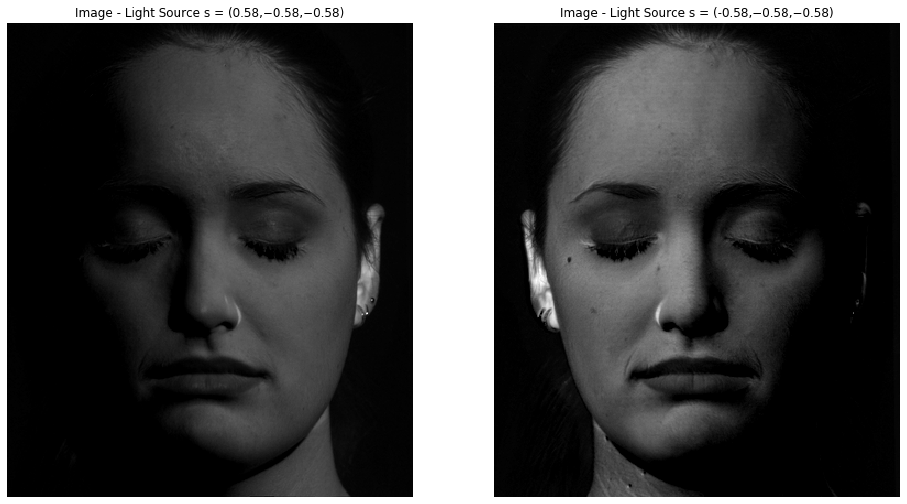

In [6]:
s_1 = np.array([0.58, -0.58, -0.58])
s_2 = np.array([-0.58, -0.58 , -0.58])

rad_1 = srf_normal@s_1
rad_1[np.where(rad_1 < 0)] = 0
imout1 = rad_1 * albedo

rad_2 = srf_normal@s_2
rad_2[np.where(rad_2 < 0)] = 0
imout2 = rad_2 * albedo

fig, ax = plt.subplots(1, 2, figsize = (16, 12))

ax[0].imshow(imout1,cmap='gray')
ax[0].set_title('Image - Light Source s = (0.58,−0.58,−0.58)')
ax[0].axis('off')
ax[1].imshow(imout2,cmap='gray')
ax[1].set_title('Image - Light Source s = (-0.58,−0.58,−0.58)')
ax[1].axis('off')

**d.** The function <tt> integrate_frankot()</tt> below can be used to recover a surface $z(x,y)$ from your
surface normals $\hat{n}(x,y)$. Run the two cells below to generate and display your surface, and then modify the second cell to include two views of your surface.

In [7]:
def integrate_frankot(N):
    
    """
    integrate_frankot(N) takes an PxQx3 field of normal vectors (the third
    dimension is [x y z]) and returns a PxQ array corresponding to the
    depth of the surface, with the mean depth equal to zero.
    
    Reference: Frankot, R. and Chellapa, R. (1988) "A Method for Enforcing
    Integrability in Shape from Shading Algorithms."  IEEE Trans. Pattern
    Anal. Mach. Intell. 10(4):439-451.

    Args:
        N: PxQx3 field of normal vectors

    Returns:
        PxQ array corresponding to the depth of the surface, with the mean depth equal to zero

    Todd Zickler, November 2001; updated for CS283 October. 2019.

    """

    h, w = N[:, :, 0].shape

    # complain if P or Q are too big
    if (h > 512) | (w > 512):
        print('Input array too big.  Choose a smaller window.')

    # pad the array to 512x512
    nrows = 2 ** 9
    ncols = 2 ** 9
    
    # get surface slopes from normals; ignore points where normal is [0 0 0]
    x_sample = 1
    y_sample = 1
    zx = -x_sample * (np.sum(N, 2) != 0) * N[:, :, 0] / (N[:, :, 2] + (N[:, :, 2] == 0))
    zy = -y_sample * (np.sum(N, 2) != 0) * N[:, :, 1] / (N[:, :, 2] + (N[:, :, 2] == 0))

    Zx_sq = np.fft.fft2(zx, s=[nrows, ncols])
    Zy_sq = np.fft.fft2(zy, s=[nrows, ncols])
    h2 = nrows
    w2 = ncols
    
    Zx = Zx_sq.flatten('C')
    Zy = Zy_sq.flatten('C')
    
    # compute repeated frequency vectors (See Chellapa paper)
    h2_vec = np.expand_dims(np.concatenate((np.arange(0, h2/2 + 1),np.arange(-h2/2+1, 0))), 1)
    w2_vec = np.expand_dims(np.concatenate((np.arange(0, w2/2 + 1),np.arange(-w2/2+1, 0))), 1)
    
    Wx = np.squeeze(np.tile(2 * np.pi / h2 * h2_vec, [w2, 1]))
    Wy = np.squeeze(np.kron(2 * np.pi / w2 * w2_vec, np.ones((h2, 1))))
    
    # compute transform of least squares closest integrable surface
    Wx[0] = 1
    Wy[0] = 1
    # remove first column because it's all zeros (then add C(0)=0)
    C = (-1j * Wx * Zx - 1j * Wy * Zy) / (np.power(Wx, 2) + np.power(Wy, 2))
  
    # set DC component of C
    C[0] = 0
    
    # invert transform to get depth of integrable surface
    Z = np.real(np.fft.ifft2(np.reshape(C, [h2, w2], 'C')))
    
    # crop Z to original input shape
    Z = Z[:h, :w]
    
    return Z

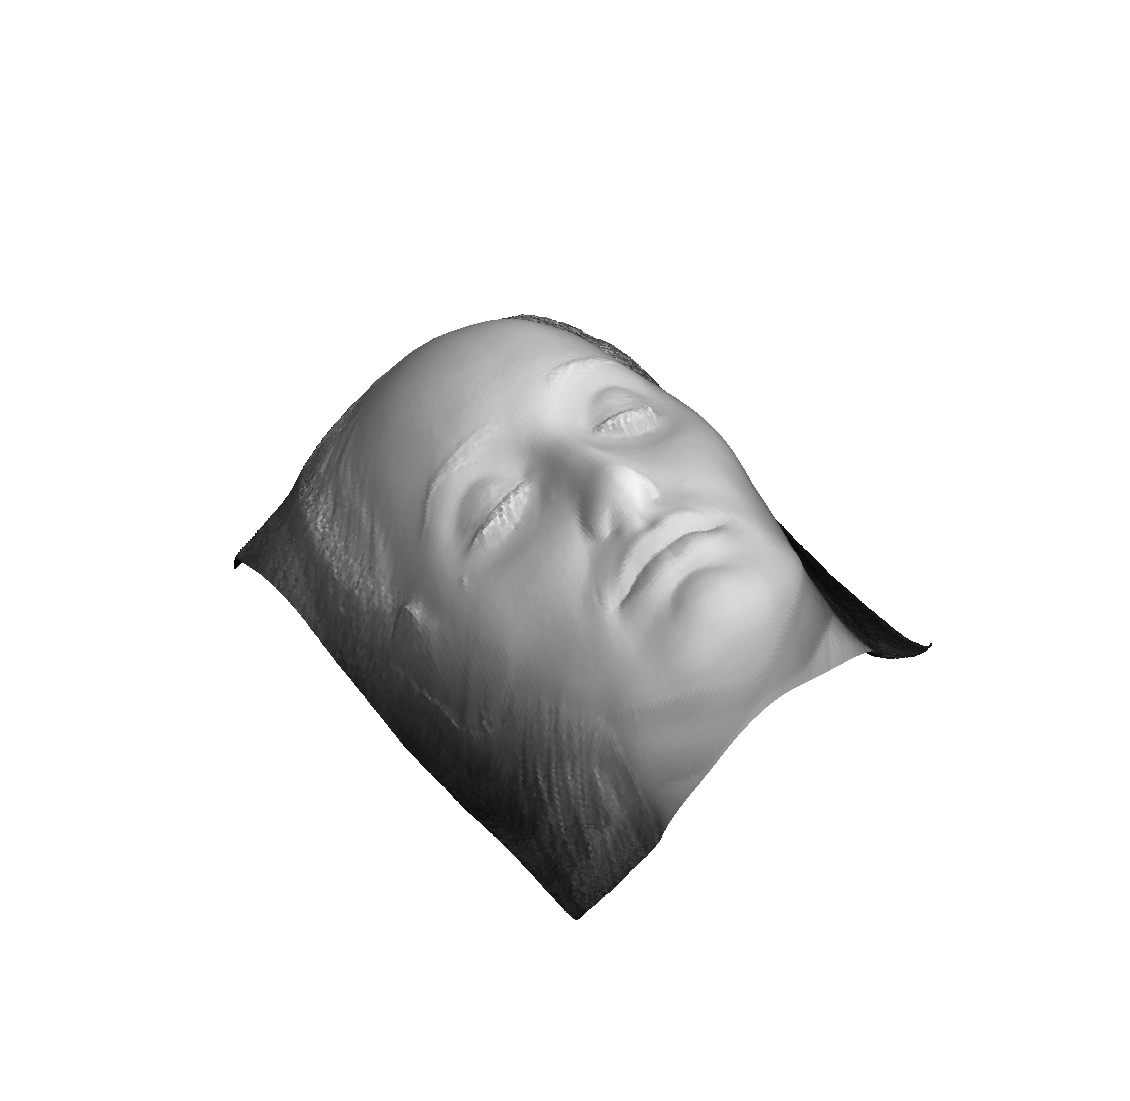

In [8]:
# Run the cell below to plot Z as a surface:

Z = integrate_frankot(srf_normal)

h, w = srf_normal[:, :, 0].shape

# Define a meshgrid of X and Y coordinates
X,Y = np.meshgrid(np.arange(w), np.arange(h))

# Create a figure and define its axes
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.axis('off')

# Define the viewing angle
ax.view_init(elev=240, azim=-50)

# Define a light source direction
ls = LightSource(azdeg=260, altdeg=125)
surf_illum = ls.shade(Z, cmap=cm.gist_yarg)

# Shade data, creating an rgb array.
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0,
                       antialiased=False, facecolors=surf_illum)#color='gray')
# Resolution of rendering and time needed to render will depend on rstride and cstride

# Create cubic bounding box to simulate equal aspect ratio
# https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
    ax.plot([xb], [yb], [zb], 'w')

# Show the plot
plt.show()

In [ ]:
# Run the cell below to plot Z as a surface:

Z = integrate_frankot(srf_normal)

h, w = srf_normal[:, :, 0].shape

# Define a meshgrid of X and Y coordinates
X,Y = np.meshgrid(np.arange(w), np.arange(h))

# Create a figure and define its axes
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.axis('off')

# Define the viewing angle
ax.view_init(elev=240, azim=90)

# Define a light source direction
ls = LightSource(azdeg=260, altdeg=125)
surf_illum = ls.shade(Z, cmap=cm.gist_yarg)

# Shade data, creating an rgb array.
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0,
                       antialiased=False, facecolors=surf_illum)#color='gray')
# Resolution of rendering and time needed to render will depend on rstride and cstride

# Create cubic bounding box to simulate equal aspect ratio
# https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
    ax.plot([xb], [yb], [zb], 'w')

# Show the plot
plt.show()

## Hints and Information

- The following code demonstrates one way to use the <tt>matplotlib.pyplot.quiver</tt> function.

```python
# vect_x is an HxW array of x-components
# vect_y is an HxW array of y-components
plt.figure()
plt.quiver(vect_x,vect_y,cmap='gray')
plt.gca().invert_yaxis();
plt.axis('image');
plt.axis('off')';

```

Note that the vector components should be displayed at a suitable resolution.  For example, the figure below shows the $x$-$y$ components of a field of surface normals at three different resolutions. The plot in the middle provides the best summary of the surface shape.  The resolution can be adjusted by plotting only every
$n^\mathrm{th}$ element as in <tt>plt.quiver(vect_x[::n, ::n], vect_y[::n, ::n])</tt>.

<img src="img/babys_normals.png" width="800">

- When computing the output radiance from a field of surface normals $\hat{n}(x,y)$ illuminated from direction $\hat{s}$, clip negative values using $L=\max(0,\hat{n}\cdot\hat{s})$.

- We are commonly faced with a situation in which we need to evaluate the integral over the hemisphere of the function $\cos\theta$, where $0\le\theta\pi$ is the angular distance between the radial line through a point on the hemisphere and the radial line through its apex.

\begin{equation}
\int_\Omega \cos\theta d\omega
\end{equation}

The first step is to define a parameterization of the hemisphere using spherical coordinates, and the second is to write an element of the solid angle $d\omega$ in terms of this parameterization. As shown in almost any introductory calculus book (and Forsyth & Ponce), we can write this integral as

\begin{equation}
\int_0^{2\pi} \int_0^{\pi/2} \cos\theta\sin\theta d\theta d\phi,
\end{equation}

which is straightforward to evaluate using the appropriate trigonometric identity. 